In [2]:
import pandas as pd

Example of running (so-far untested) pyOZ code e.g. for charged hard-spheres HNC closure
`python pyoz.py -i tests/hs_chg/nrcg.in`

In [30]:
!cat ../pyOZ_bulk_fluid/pyoz-0.3/tests/hs_chg/nrcg.in

# 2 components, charged hard spheres
# with HNC
# nr/cg iteration

# control variables for the calculation
%ctrl
    npoints 	4096	# use power of 2!
    deltar 	0.05	# discretization step in A
    mix_param 	1.0	# mixing parameter for direct iteration
    conv_crit 	1e-9	# convergence criterion
    max_iter 	500	# maximum number of iterations
    use_nr
    nr_conv_crit 1e-3	# relative convergence criterion
    nr_max_iter 10	# maximum internal iterations
%end

# system information
%syst
    temp	300.00	# system temperature
    epsilon_r	78.3	# dielectric constant
    ncomp	2	# number of components
    closure	HNC	# closure relation
    names	P M	# names of components
    conc	0.5 0.5	# concentrations of individual components
    conc_unit	mol_L	# in moles pro liter
%end

# parm containts information about interatomic potentials
%parm
    # hard spheres potential
    %potential	HS
	hs_diameter	4.0 6.0	# ncomp values of hs diameters
	hs_unit 	A	# supported units A, m, nm, pm
    %end_po

In [19]:
CR_PATH = "../pyOZ_bulk_fluid/pyoz-0.3/tests/hs_chg/picard-cr.dat.orig"
GR_PATH = "../pyOZ_bulk_fluid/pyoz-0.3/pyoz-gr.dat"

In [10]:
!head $CR_PATH

   0.000   0.00000   0.00000   0.00000
   0.050  -2.14950  -0.42411  -2.33814
   0.100  -2.14493  -0.42415  -2.33303
   0.150  -2.13966  -0.42421  -2.32712
   0.200  -2.13430  -0.42430  -2.32110
   0.250  -2.12892  -0.42441  -2.31505
   0.300  -2.12355  -0.42455  -2.30901
   0.350  -2.11821  -0.42471  -2.30299
   0.400  -2.11291  -0.42490  -2.29700
   0.450  -2.10764  -0.42512  -2.29104


In [20]:
cr = pd.read_csv(CR_PATH, header=None, delim_whitespace=True)

In [21]:
cr.head()

,0,1,2,3
0,0.00,0.00000,0.00000,0.00000
1,0.05,-2.14950,-0.42411,-2.33814
2,0.10,-2.14493,-0.42415,-2.33303
3,0.15,-2.13966,-0.42421,-2.32712
4,0.20,-2.13430,-0.42430,-2.32110


In [22]:
cr.set_index(0, inplace=True)

<AxesSubplot:xlabel='0'>

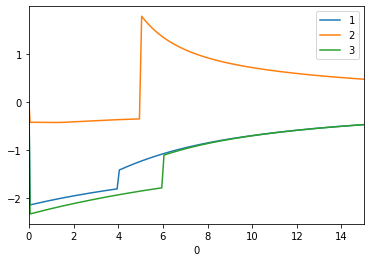

In [29]:
cr.plot(xlim=[0, 15])

In [24]:
gr = pd.read_csv(GR_PATH, header=None, delim_whitespace=True)

In [25]:
gr.set_index(0, inplace=True)

<AxesSubplot:xlabel='0'>

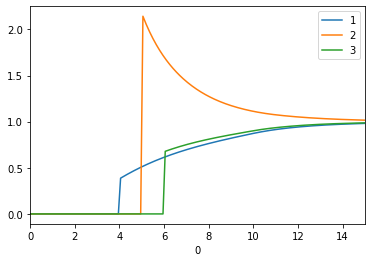

In [28]:
from matplotlib.pyplot import xlim


gr.plot(xlim=[0, 15])